In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score

from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier

basePre = pd.read_csv('./bases/base_pre.csv')
baseScaled = pd.read_csv('./bases/base_scaled.csv')
basePCACompleta = pd.read_csv('./bases/base_train_completa.csv')
basePCAInversa = pd.read_csv('./bases/base_train_correlacao_inversa.csv')
basePCAProporcional = pd.read_csv('./bases/base_train_correlacao_proporcional.csv')
basePca70 = pd.read_csv('./bases/base_train_70.csv')
basePca50 = pd.read_csv('./bases/base_train_50.csv')

cv = 5
clf = GaussianNB()
clf

GaussianNB(priors=None, var_smoothing=1e-09)

SINGLE EXECUTION

Applying in baseScaled

In [32]:
Y = basePre['target']

x_train, x_test, y_train, y_test = train_test_split(baseScaled, Y, test_size=0.30, random_state=0)

clf = GaussianNB()
clf.fit(x_train, y_train)

score = clf.score(x_test, y_test)

In [33]:
sc = cross_val_score(clf, baseScaled, Y, cv=cv)

In [34]:
accArray = np.array([[sc.mean(), sc.std()*2]])

Applying in basePCAInversa

In [35]:
x_train, x_test, y_train, y_test = train_test_split(basePCAInversa, Y, test_size=0.30, random_state=0)

clf = GaussianNB()
clf.fit(x_train, y_train)

score = clf.score(x_test, y_test)

In [36]:
sc = cross_val_score(clf, basePCAInversa, Y, cv=cv)

In [37]:
accArray = np.append(accArray, [[sc.mean(), sc.std()*2]], axis=0)

Applying in basePCAProporcional

In [38]:
x_train, x_test, y_train, y_test = train_test_split(basePCAProporcional, Y, test_size=0.30, random_state=0)

clf = GaussianNB()
clf.fit(x_train, y_train)

score = clf.score(x_test, y_test)

In [39]:
sc = cross_val_score(clf, basePCAProporcional, Y, cv=cv)

In [40]:
accArray = np.append(accArray, [[sc.mean(), sc.std()*2]], axis=0)

PCA  com 70%

In [41]:
x_train, x_test, y_train, y_test = train_test_split(basePca70, Y, test_size=0.30, random_state=0)

clf = GaussianNB()
clf.fit(x_train, y_train)

score = clf.score(x_test, y_test)

In [42]:
sc = cross_val_score(clf, basePca70, Y, cv=cv)

In [43]:
accArray = np.append(accArray, [[sc.mean(), sc.std()*2]], axis=0)

PCA com 50%

In [44]:
x_train, x_test, y_train, y_test = train_test_split(basePca50, Y, test_size=0.30, random_state=0)

clf = GaussianNB()
clf.fit(x_train, y_train)

score = clf.score(x_test, y_test)

In [45]:
sc = cross_val_score(clf, basePca50, Y, cv=cv)

In [46]:
accArray = np.append(accArray, [[sc.mean(), sc.std()*2]], axis=0)

In [47]:
dfAcc = pd.DataFrame(accArray, columns=['mean', 'std'], index=None)

In [48]:
dfAcc = (dfAcc*100).apply(np.floor)
dfAcc

,mean,std
0,81.0,13.0
1,75.0,12.0
2,74.0,9.0
3,82.0,9.0
4,81.0,8.0


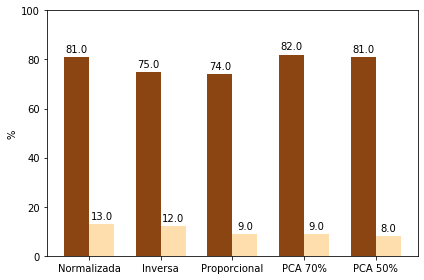

In [49]:
from plt import *

single(dfAcc, 'naiveSingle.png', '#8B4513', '#FFDEAD')

BAGGING com a melhor single

In [50]:
clf = GaussianNB()

model = BaggingClassifier(clf, n_estimators=5, random_state=0)

sc = cross_val_score(model, basePca70, Y, cv=cv)

In [51]:
accArray = np.array([[sc.mean(), sc.std()*2]])

In [52]:
clf = GaussianNB()

model = BaggingClassifier(clf, n_estimators=10, random_state=0)

sc = cross_val_score(model, basePca70, Y, cv=cv)

In [53]:
accArray = np.append(accArray, [[sc.mean(), sc.std()*2]], axis=0)

In [54]:
clf = GaussianNB()

model = BaggingClassifier(clf, n_estimators=20, random_state=0)

sc = cross_val_score(model, basePca70, Y, cv=cv)

In [55]:
accArray = np.append(accArray, [[sc.mean(), sc.std()*2]], axis=0)

In [56]:
clf = GaussianNB()

model = BaggingClassifier(clf, n_estimators=30, random_state=0)

sc = cross_val_score(model, basePca70, Y, cv=cv)

In [57]:
accArray = np.append(accArray, [[sc.mean(), sc.std()*2]], axis=0)

In [58]:
dfAcc = pd.DataFrame(accArray, columns=['mean', 'std'], index=None)

In [59]:
dfAcc = (dfAcc*100).apply(np.floor)
dfAcc

,mean,std
0,82.0,10.0
1,82.0,8.0
2,82.0,9.0
3,81.0,8.0


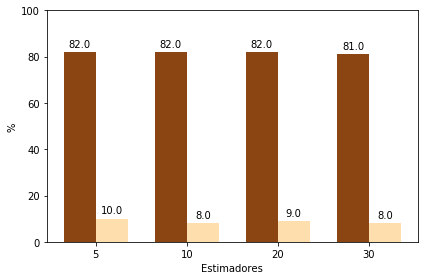

In [60]:
bagging(dfAcc, 'naiveBagging.png', '#8B4513', '#FFDEAD')